#                                             CVS

### Data collection

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
tickers = ['CVS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6867 entries, 1995-01-03 to 2022-04-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     6867 non-null   float64
dtypes: float64(1)
memory usage: 107.3 KB


In [6]:
mydata.head()

,CVS
Date,
1995-01-03,4.515667
1995-01-04,4.497678
1995-01-05,4.515667
1995-01-06,4.515667
1995-01-09,4.479688


In [7]:
mydata.tail()

,CVS
Date,
2022-04-04,100.000000
2022-04-05,99.459999
2022-04-06,102.059998
2022-04-07,103.610001
2022-04-08,106.610001


### Normalization to 100:

In [8]:
mydata.iloc[0]

CVS    4.515667
Name: 1995-01-03 00:00:00, dtype: float64

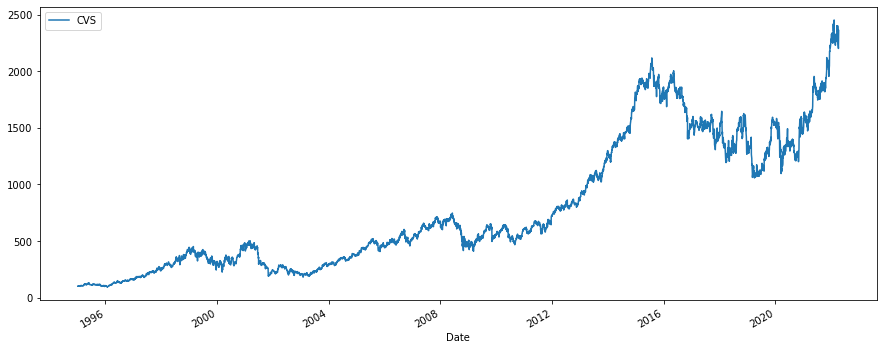

In [9]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Find a stock price based on the graph date:

In [10]:
mydata.loc['2019-09-26']

CVS    57.472229
Name: 2019-09-26 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,CVS
Date,
2022-04-04,-0.010782
2022-04-05,-0.005400
2022-04-06,0.026141
2022-04-07,0.015187
2022-04-08,0.028955


### Porfolio Weights:

In [12]:
weights = np.array([1])

In [13]:
np.dot(returns, weights)

array([        nan, -0.00398383,  0.00399976, ...,  0.02614115,
        0.01518718,  0.02895473])

***

## Average Annual Returns of the porfolio over past couple decades:

### CVS Stock:

In [14]:
annual_returns = returns.mean() * 250
annual_returns

CVS    0.161483
dtype: float64

### Total porfolio:

In [15]:
np.dot(annual_returns, weights)

0.16148302585137309

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print (pfolio_1)

16.1 %


***

## Compare the risk between CVS and S&P500 index

In [17]:
tickers = ['CVS', 'VOO']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2011-1-1')['Adj Close']

In [18]:
returns = np.log(data / data.shift(1))
returns

,CVS,VOO
Date,,
2010-12-31,NaN,NaN
2011-01-03,0.008020,0.009337
2011-01-04,-0.000856,-0.000861
2011-01-05,0.010510,0.005325
2011-01-06,-0.010225,-0.001715
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### CVS

Daily risk:

In [19]:
returns['CVS'].std()

0.01501260958556514

Annual risk:

In [20]:
returns['CVS'].std() * 250 ** 0.5

0.23737019956631156

### S&P 500

Daily risk:

In [21]:
returns['VOO'].std()

0.010827403574846984

Annual risk:

In [22]:
returns['VOO'].std() * 250 ** 0.5

0.1711962822118293

******

### Volatility:

In [23]:
vols = returns[['CVS', 'VOO']].std() * 250 ** 0.5
vols

CVS    0.237370
VOO    0.171196
dtype: float64

***

# Calculating Porfolio Risk:

## Covariance and Correlation

In [24]:
cov_matrix = returns.cov()
cov_matrix

,CVS,VOO
CVS,0.000225,0.000091
VOO,0.000091,0.000117


In [25]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,CVS,VOO
CVS,0.056345,0.022784
VOO,0.022784,0.029308


***

In [26]:
corr_matrix = returns.corr()
corr_matrix

,CVS,VOO
CVS,1.000000,0.560667
VOO,0.560667,1.000000


## Calculating Portfolio Risk

Equal weigthing scheme:

In [27]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [28]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.032805068950453556

Portfolio Volatility:

In [29]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.1811216965204709

In [30]:
print (str(round(pfolio_vol, 3) * 100) + ' %')

18.099999999999998 %


***

# Testing different weight combination for a porfolio. 

In [31]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['AAPL','OXY', 'CVS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [32]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.160314  , 0.51944416, 0.32024185])

Expected Portfolio Return:

In [33]:
np.sum(weights * log_returns.mean()) * 250

0.061312324304467924

Expected Portfolio Variance:

In [34]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.10111976407645813

Expected Portfolio Volatility:

In [35]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.31799333967311033

In [36]:
pf_returns = []
pf_volatilities = []
weights_1 = []
weights_2 = []
weights_3 = []

In [37]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_1.append(weights[0])
    weights_2.append(weights[1])
    weights_3.append(weights[2])
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

In [38]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)
weights_1 = np.array(weights_1)
weights_2 = np.array(weights_2)
weights_3 = np.array(weights_3)


In [39]:
portfolios = pd.DataFrame({'Return' : pf_returns, 'Volatility' : pf_volatilities, 'AAPL_weights' : weights_1, 'OXY_weights': weights_2, 'CVS_weights': weights_3})

In [40]:
portfolios.head()

,Return,Volatility,AAPL_weights,OXY_weights,CVS_weights
0,0.064233,0.295674,0.148389,0.454534,0.397077
1,0.218796,0.240274,0.752734,0.038499,0.208766
2,0.196480,0.225886,0.638877,0.033572,0.327551
3,0.129481,0.223992,0.362322,0.178265,0.459413
4,0.146872,0.222042,0.438647,0.151794,0.409559


In [41]:
portfolios.tail()

,Return,Volatility,AAPL_weights,OXY_weights,CVS_weights
995,0.084296,0.291929,0.245038,0.445014,0.309947
996,0.075478,0.367773,0.281118,0.641158,0.077724
997,0.051757,0.340520,0.137062,0.579636,0.283302
998,0.037820,0.405754,0.133217,0.740915,0.125868
999,0.182978,0.221777,0.581733,0.059276,0.358990


Text(0, 0.5, 'Expected Return')

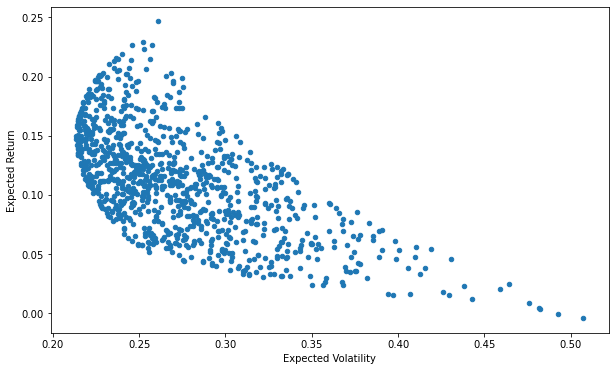

In [42]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

*****

# Assess if a stock is defensive or aggressive - Beta Value

In [43]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as wb 
stockvsmarket = ['CVS', '^GSPC']
stock_data = pd.DataFrame()

for i in stockvsmarket:
    stock_data[i] = wb.DataReader(i, data_source = 'yahoo', start = '04-10-2017', end = '04-01-2022')['Adj Close']
    

In [44]:
stock_return = np.log(stock_data/stock_data.shift(1))

In [45]:
cov = stock_return.cov()*250

In [46]:
cov_with_market = cov.iloc[0,1]

In [47]:
market_var = stock_return['^GSPC'].var()*250

In [48]:
stock_beta = cov_with_market / market_var

stock_beta

0.7768774219622664

# Calculated expected return for a stock

In [49]:
expected_future_return = 0.0270 + stock_beta*0.05
expected_future_return

# 0.0270 = 10 years US treasury bond

0.06584387109811332

**Sharpe ratio:**

In [50]:
Sharpe_CVS = (expected_future_return - 0.0185)/(stock_return['CVS'].std()*250**0.5)
Sharpe_CVS

0.16583982485254706

# Monte Carlo- Predicting Gross Profit

In [51]:
import numpy as np 
import matplotlib.pyplot as plt

In [52]:
rev_m = 170
rev_stdev = 20 
iterations = 1000 

In [53]:
rev = np.random.normal(rev_m, rev_stdev, iterations)

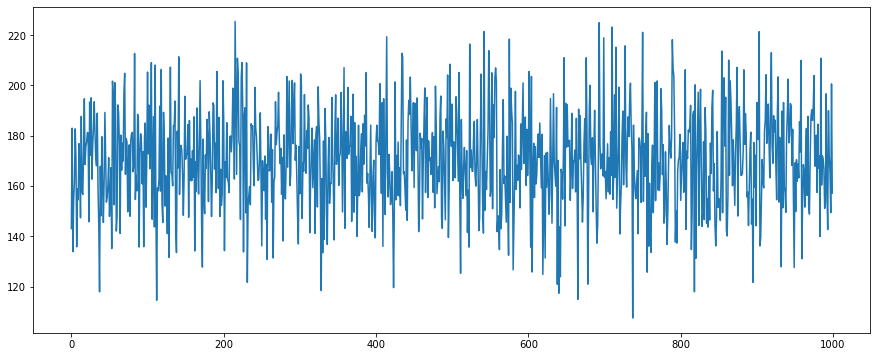

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

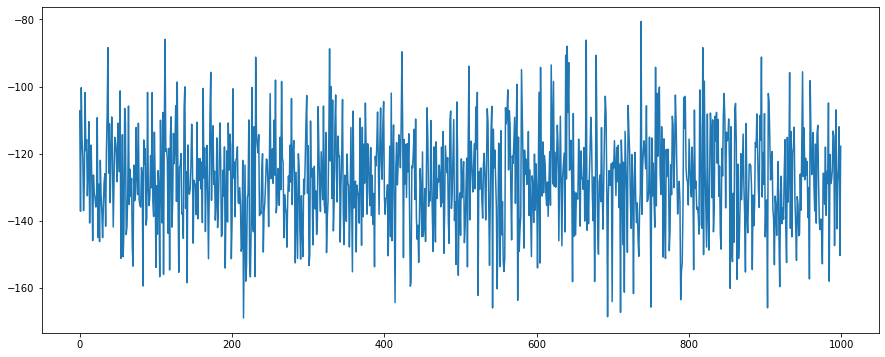

In [55]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize =(15, 6))
plt.plot(COGS)
plt.show()


In [56]:
COGS.mean()

-127.6900458024166

In [57]:
COGS.std()

14.97569825753659

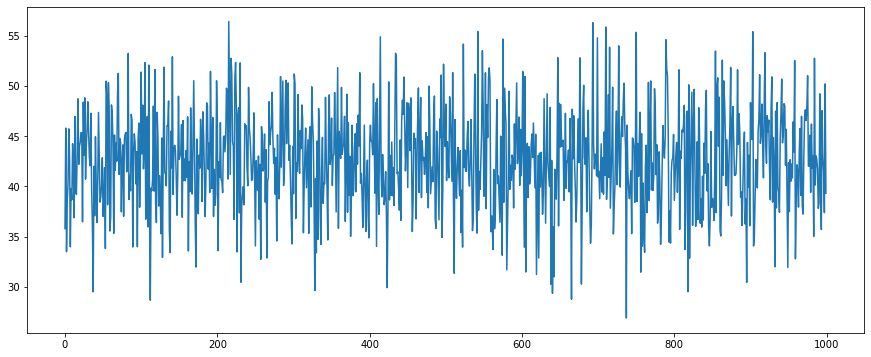

In [58]:
Gross_Profit = rev + COGS
Gross_Profit 

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [59]:
max(Gross_Profit)

56.40565730604874

In [60]:
min(Gross_Profit)

26.898753895806266

In [61]:
Gross_Profit.mean()

42.62015264045028

In [62]:
Gross_Profit.std()

4.998561490228984

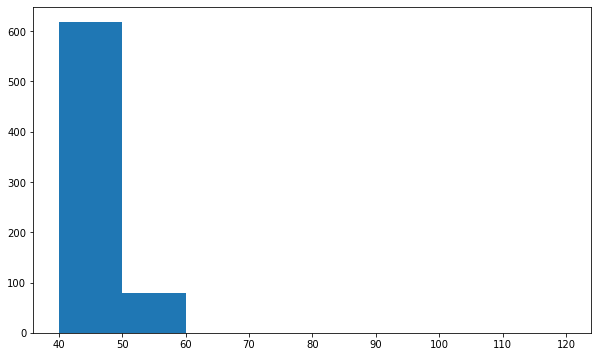

In [63]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

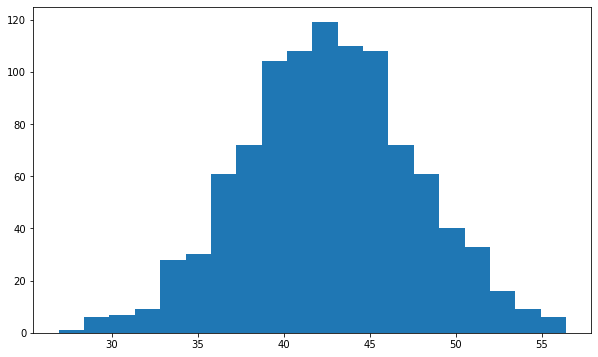

In [64]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

# Forcasting Stock Prices

In [65]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline 

In [66]:
ticker = 'CVS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start ='2010-1-1')['Adj Close']

In [67]:
log_return = np.log(1 + data.pct_change())

In [68]:
log_return.tail()

,CVS
Date,
2022-04-04,-0.010841
2022-04-05,-0.005415
2022-04-06,0.025805
2022-04-07,0.015073
2022-04-08,0.028543


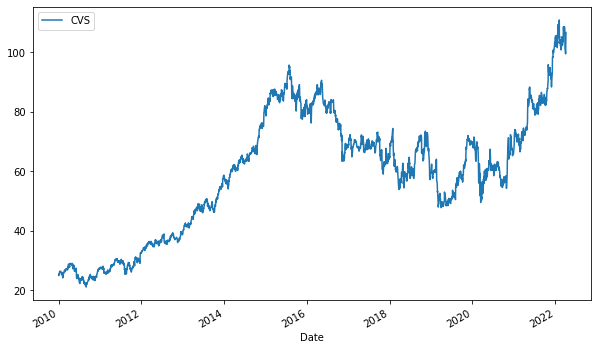

In [69]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

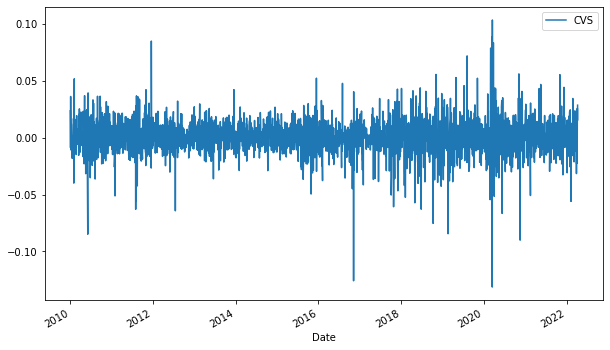

In [70]:
log_return.plot(figsize= (10, 6))

In [71]:
u = log_return.mean()
u

CVS    0.00047
dtype: float64

In [72]:
var = log_return.var()
var

CVS    0.000226
dtype: float64

In [73]:
drift = u - (0.5 * var)
drift

CVS    0.000357
dtype: float64

In [74]:
stdev = log_return.std()
stdev

CVS    0.015038
dtype: float64

In [75]:
type(drift)

pandas.core.series.Series

In [76]:
type(stdev)

pandas.core.series.Series

In [77]:
np.array(drift)

array([0.00035668])

In [78]:
drift.values

array([0.00035668])

In [79]:
stdev.values

array([0.01503762])

In [80]:
norm.ppf(0.95)

1.6448536269514722

In [81]:
x = np.random.rand(10,2)
x

array([[0.37286265, 0.60849175],
       [0.31956671, 0.85292339],
       [0.85752237, 0.36081182],
       [0.67486771, 0.42348389],
       [0.75257147, 0.07081666],
       [0.06200221, 0.45321501],
       [0.3921116 , 0.63516069],
       [0.86804064, 0.99341337],
       [0.52870967, 0.34122707],
       [0.11432805, 0.49240345]])

In [82]:
norm.ppf(x)

array([[-0.32428102,  0.27539015],
       [-0.46891077,  1.04905408],
       [ 1.06925393, -0.35628968],
       [ 0.45339466, -0.19298876],
       [ 0.68260409, -1.46973579],
       [-1.53818081, -0.11754268],
       [-0.27381968,  0.34555306],
       [ 1.11717684,  2.47905083],
       [ 0.0720267 , -0.40911654],
       [-1.20382791, -0.01904288]])

In [83]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.69077083, -2.21514369],
       [ 0.29823358,  0.05139114],
       [ 2.45012451, -0.84166149],
       [-1.0692363 ,  0.95293257],
       [-0.90472144,  0.50316122],
       [-0.49009806, -0.30383898],
       [ 0.71850077, -1.27759711],
       [-1.25522997,  0.71355341],
       [ 0.9930969 ,  0.43171376],
       [-0.54530365, -0.02522667]])

In [84]:
t_intervals = 1000
iterations = 10 

In [85]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [86]:
daily_returns

array([[0.98584597, 1.02284415, 0.9979406 , ..., 1.01721377, 1.0105523 ,
        0.9926025 ],
       [1.01354056, 0.99335785, 1.02187244, ..., 1.02600245, 1.01677992,
        0.99463525],
       [0.98860471, 0.98255824, 1.01062253, ..., 1.00681182, 1.00587097,
        1.03820849],
       ...,
       [1.02905091, 1.02489449, 1.02483448, ..., 1.00519329, 0.99525127,
        0.99478307],
       [1.00421677, 1.01274507, 1.03342715, ..., 1.01854445, 1.01972556,
        0.99518028],
       [0.98472417, 1.00761436, 1.00350082, ..., 1.01777858, 0.98066169,
        0.9758305 ]])

In [87]:
S0 = data.iloc[-1]
S0

CVS    106.610001
Name: 2022-04-08 00:00:00, dtype: float64

In [88]:
price_list = np.zeros_like(daily_returns)

In [89]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
price_list[0] = S0
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [91]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1]* daily_returns[t]

In [92]:
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [108.05356013, 105.90188149, 108.94182141, ..., 109.3821223 ,
        108.39890794, 106.03806428],
       [106.8222581 , 104.05476588, 110.09905881, ..., 110.12721316,
        109.0353144 , 110.08961875],
       ...,
       [266.64661358, 116.2584374 , 215.88444981, ..., 240.29484963,
        114.40389226, 112.42025142],
       [267.77100142, 117.7401588 , 223.10085254, ..., 244.75098446,
        116.66057266, 111.87841686],
       [263.680577  , 118.63667501, 223.88188763, ..., 249.10230997,
        114.40455409, 109.17437133]])

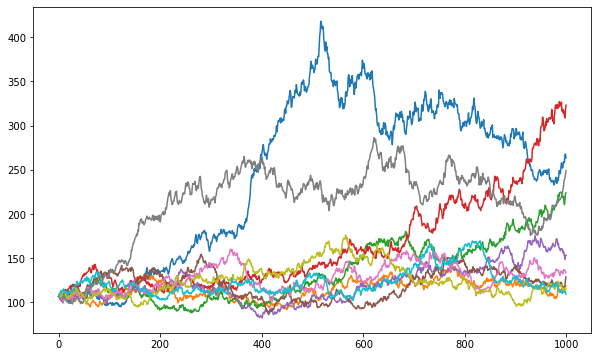

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);